In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
DATE_COL = 'date'
GROUP_COL = 'state'
DISTRICT_COL = 'district'
VALUE_COL_1 = 'demo_age_5_17'
VALUE_COL_2 = 'demo_age_17_'
df = pd.read_csv("demographic_processed.csv")
df[DATE_COL] = pd.to_datetime(
    df[DATE_COL],
    format='mixed',
    dayfirst=True,
    errors='coerce'
)

df = df.dropna(subset=[DATE_COL])
df['month_period'] = df[DATE_COL].dt.to_period('M')
df['month'] = df['month_period'].astype(str)

df['total_demo'] = df[VALUE_COL_1] + df[VALUE_COL_2]

# Prevent divide-by-zero
df['age_ratio'] = df[VALUE_COL_2] / df[VALUE_COL_1].replace(0, 1)

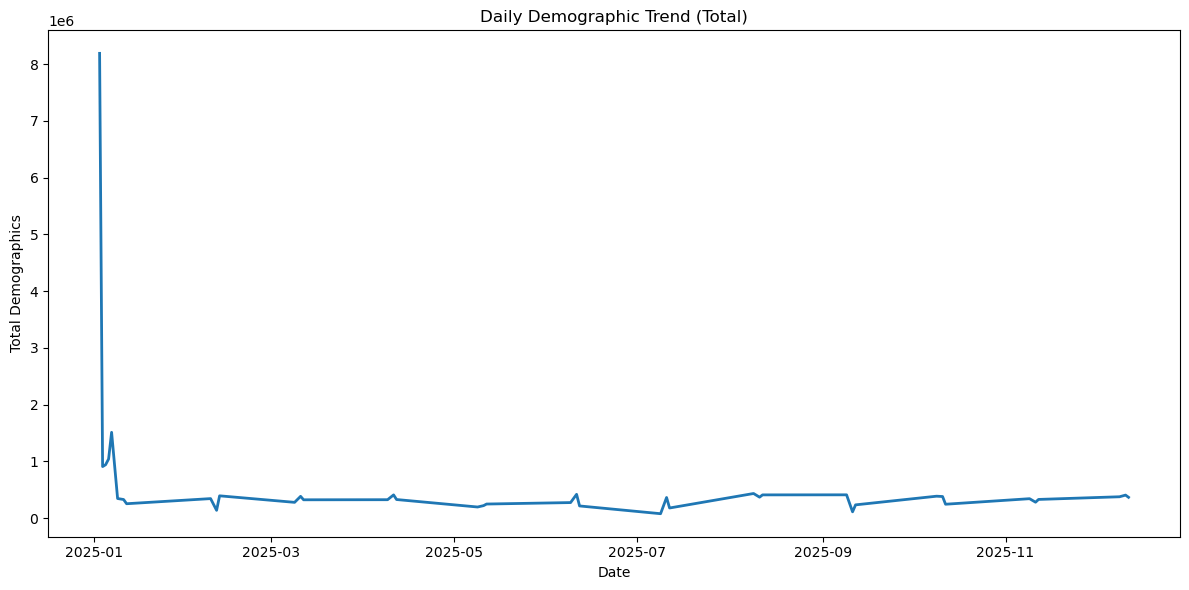

In [12]:
#DAILY TREND — TOTAL
daily = df.groupby(DATE_COL)['total_demo'].sum().reset_index()

plt.figure(figsize=(12,6))
plt.plot(daily[DATE_COL], daily['total_demo'], linewidth=2)
plt.title("Daily Demographic Trend (Total)")
plt.xlabel("Date")
plt.ylabel("Total Demographics")
plt.tight_layout()
plt.show()

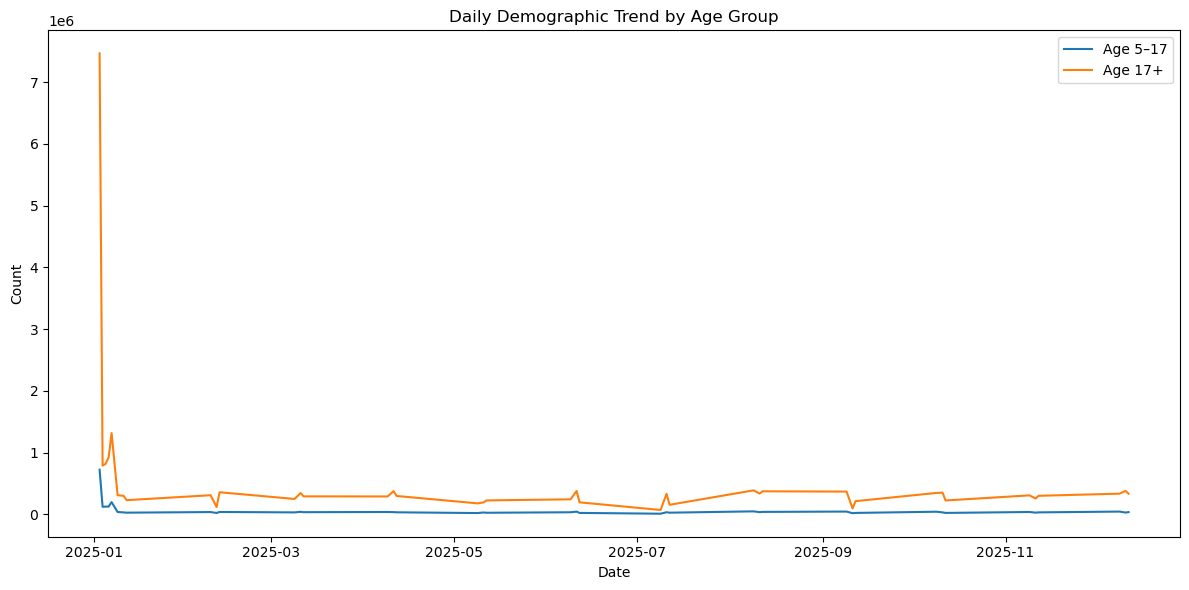

In [13]:
# DAILY TREND — BY AGE GROUP
daily_age = df.groupby(DATE_COL)[[VALUE_COL_1, VALUE_COL_2]].sum().reset_index()

plt.figure(figsize=(12,6))
plt.plot(daily_age[DATE_COL], daily_age[VALUE_COL_1], label="Age 5–17")
plt.plot(daily_age[DATE_COL], daily_age[VALUE_COL_2], label="Age 17+")
plt.title("Daily Demographic Trend by Age Group")
plt.xlabel("Date")
plt.ylabel("Count")
plt.legend()
plt.tight_layout()
plt.show()

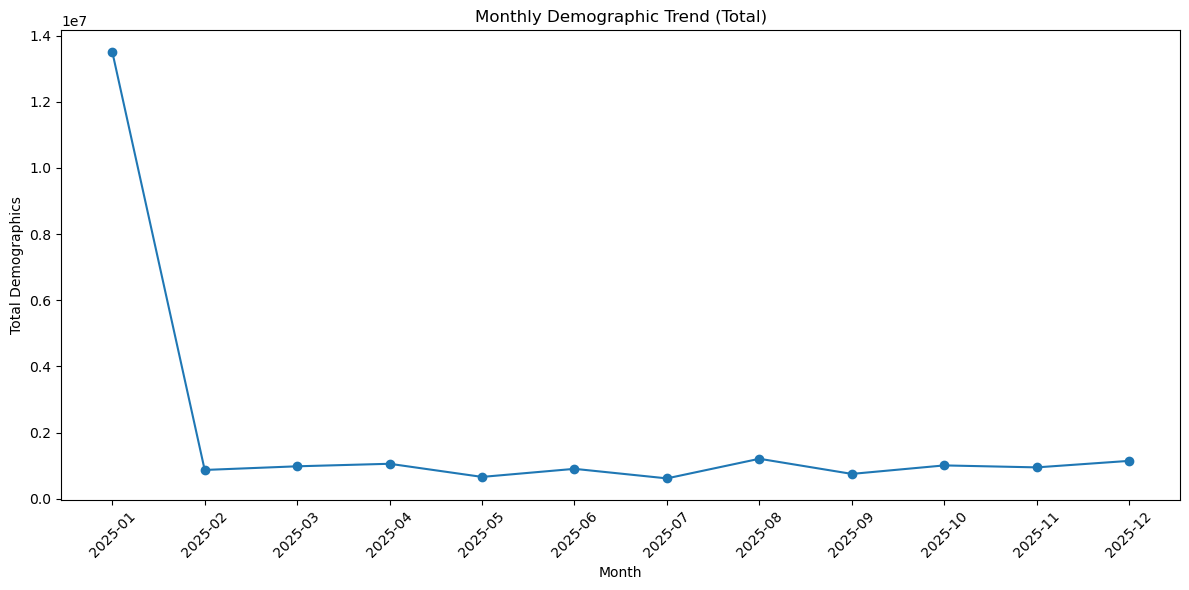

In [14]:
# MONTHLY TREND — TOTAL
monthly = df.groupby('month')['total_demo'].sum().reset_index()

plt.figure(figsize=(12,6))
plt.plot(monthly['month'], monthly['total_demo'], marker='o')
plt.xticks(rotation=45)
plt.title("Monthly Demographic Trend (Total)")
plt.xlabel("Month")
plt.ylabel("Total Demographics")
plt.tight_layout()
plt.show()

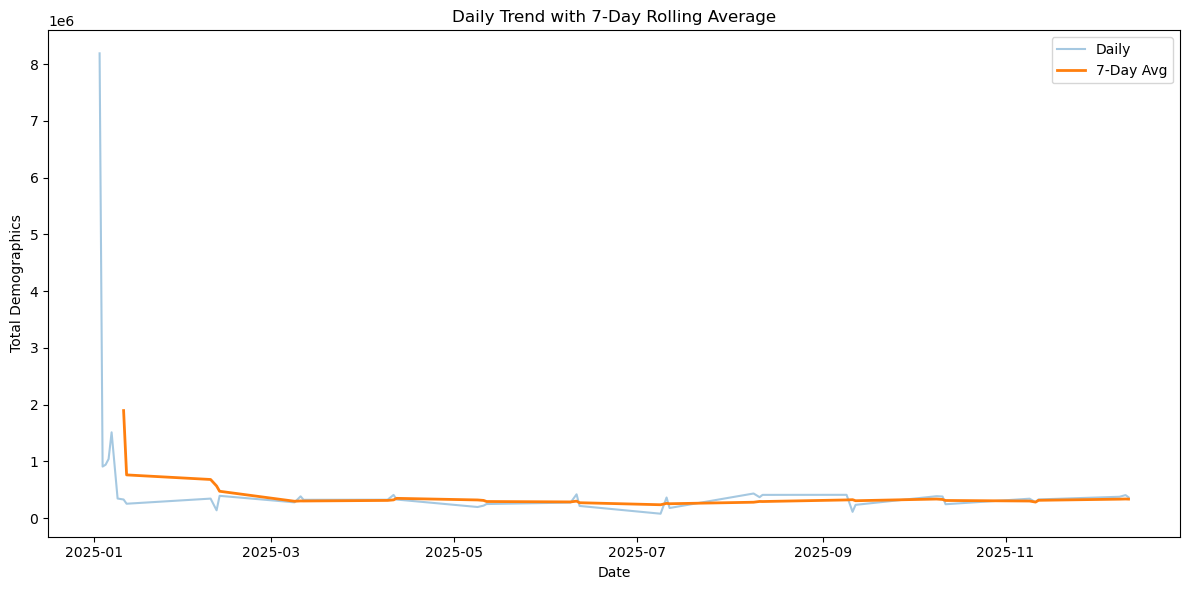

In [15]:
# ROLLING AVERAGE — 7 DAY
daily['rolling_7'] = daily['total_demo'].rolling(window=7).mean()

plt.figure(figsize=(12,6))
plt.plot(daily[DATE_COL], daily['total_demo'], alpha=0.4, label="Daily")
plt.plot(daily[DATE_COL], daily['rolling_7'], linewidth=2, label="7-Day Avg")
plt.title("Daily Trend with 7-Day Rolling Average")
plt.xlabel("Date")
plt.ylabel("Total Demographics")
plt.legend()
plt.tight_layout()
plt.show()

In [24]:
# TREND SUMMARY
print("\nTREND SUMMARY")
print("----------------------------")
print(f"Average Daily Total: {daily['total_demo'].mean():,.2f}")
print(f"Highest Day: {daily.loc[daily['total_demo'].idxmax(), DATE_COL]} "
      f"({daily['total_demo'].max():,.0f})")
print(f"Lowest Day: {daily.loc[daily['total_demo'].idxmin(), DATE_COL]} "
      f"({daily['total_demo'].min():,.0f})")
print(f"Monthly Trend Slope: {slope:.2f} records per month")

if slope > 0:
    print("Overall Trend: INCREASING 📈")
elif slope < 0:
    print("Overall Trend: DECREASING 📉")
else:
    print("Overall Trend: STABLE ➖")



TREND SUMMARY
----------------------------
Average Daily Total: 577,159.66
Highest Day: 2025-01-03 00:00:00 (8,190,152)
Lowest Day: 2025-07-09 00:00:00 (76,552)
Monthly Trend Slope: -473164.74 records per month
Overall Trend: DECREASING 📉
